# ProgHW2-b 
#### James Amidei
---------------------------------


In [1]:
import numpy as np

# Problem 1
Apply Fixed-Point Iteration to find the solution of the equation 

$$e^x+x=7$$

Iterate until the absolute difference of two successive iterates is less than $\epsilon=10^{-8}$.

(Hint: make sure you use a function $g(x)$ that theoretically works; otherwise the algorithm may diverge; the initial guess can be obtained from a plot of the function.)

----------------------------------------------------
#### Answer
----------------------------------------------------

$f(x) = e^x + x - 7$

Let $p$ be a point in the interval $[a,b]$ such that $f(p) = 0$; i.e., $p$ is a root of $f$. 

Using the definition of a fixed point where $g(p) = p - f(p)$, we get $g(p) = p - (e^p + p - 7) = 7 -e^p$, which of course is equal to $p$.

However, attemping to use $p = 7 - e^p$ with the code from our book doesn't exactly yield good results, seen below. 

In [2]:
def fixedpt(g, pzero, eps, N):
    n = 1
    while n<N:
        print(n)
        pone = g(pzero)
        if np.abs(pone-pzero)<eps:
            print('p is ', pone, ' and the iteration number is ', n)
            return
        pzero = pone
        n += 1
    print('Did not converge. The last estimate is p = ', pzero)

In [3]:
fixedpt(lambda x: (7 - np.e**x), 1.5, 1e-8, 30)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Did not converge. The last estimate is p =  7.0


So instead of using $p = 7 -e^p$, we have to come up with another guess for $g(p)$. Rearranging, we can get $p = ln(7-p)$. Fortunately, using this $g$ yields much better results.

In [4]:
fixedpt(lambda x: np.log(7 - x), 1.5, 1e-8, 30)

1
2
3
4
5
6
7
8
9
10
11
12
p is  1.672821698302485  and the iteration number is  12


In [5]:
# Confirming
x = 1.672821698302485
g = np.log(7 - x)
g

1.6728216986901814

# Problem 2
(2.4-1) Use the Python codes for the secant and Newton's methods to find solutions
for the equation $\sin x-e^{-x}=0$ on $0\leq x\leq1$. Set tolerance
to $10^{-4}$, and take $p_{0}=0$ in Newton, and $p_{0}=0,p_{1}=1$
in secant method. Do a visual inspection of the estimates and comment
on the convergence rates of the methods.

In [6]:
# Newton's method
def newton(f, fprime, pin, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin)/fprime(pin)
        if np.isclose(f(p), 0) or np.abs(p-pin) < eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        pin = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)
    
# Secant method 
def secant(f, pzero, pone, eps, N):
    n = 1
    p = 0. # to ensre the value of p carries out of the while loop
    while n <= N:
        p = pone - f(pone)*(pone-pzero) / (f(pone)-f(pzero))
        if np.isclose(f(p), 0) or np.abs(p-pone)<eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        pzero = pone
        pone = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)

Plot for $f(x) = \sin(x) - e^{-x}$

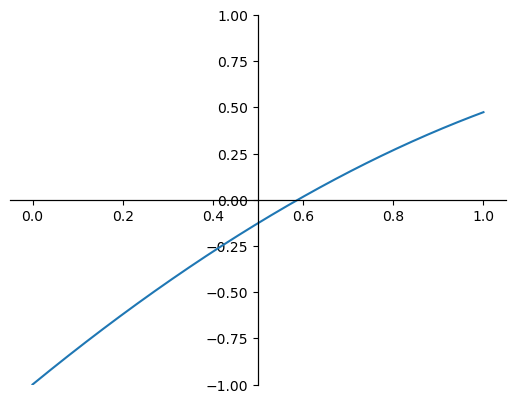

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 1, 500)
y = np.sin(x) - np.e**(-x)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_position('center')
ax.set_ylim([-1, 1])
plt.plot(x,y);

$f(x) = \sin(x) - e^{-x}$ and $f^{'}(x) = \cos(x) + e^{-x}$ 

In [8]:
newton(lambda x: np.sin(x) - np.e**(-x), lambda x: np.cos(x) + np.e**(-x), 0, 1e-4, 20)

p is  0.588532743977419  and the iteration number is  4


In [9]:
secant(lambda x: np.sin(x) - np.e**(-x), 0, 1, 1e-4, 20)

p is  0.588532742347889  and the iteration number is  5


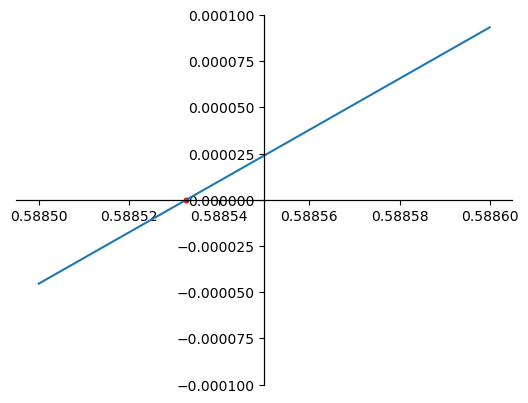

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

approx_x = [0.588532743977419, 0.588532742347889]
approx_y = [0,0]
x = np.linspace(0.5885, 0.5886, 100)
y = np.sin(x) - np.e**(-x)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_position('center')
ax.set_ylim([-0.0001, 0.0001])
ax.scatter(approx_x, approx_y, color='red', marker='.')
plt.plot(x,y);

Both approximation have a decent accuracy, only differing around $10^{-8}$. From the iteration number, we can see that Newton's method converges quicker than the Secant method in this instance, which seems to typically be the case. However, it is only quicker by one iteration. 

# Problem 3

Write a general $LU$ factorization code and use it to solve
$$
\left[\begin{array}{lll}{4} & {2} & {0} \\ {4} & {4} & {2} \\ {2} & {2} & {3}\end{array}\right]\left[\begin{array}{l}{x_{1}} \\ {x_{2}} \\ {x_{3}}\end{array}\right]=\left[\begin{array}{l}{2} \\ {4} \\ {6}\end{array}\right]
$$

In [11]:
import numpy as np

def LU(A, b):
    if A.shape[0] != A.shape[1]:
        print('Error: A must be square.')
    if A.shape[0] != b.size:
        print('Error: the shape of A does not match the size of b.')
    n = A.shape[0]
    L = np.eye(n) 
    U = np.zeros_like(A) # np.zeros(n) would results in an error

    # Used @ for matrix multiplication. Using either np.dot() or 
    # np.matmul() resulted in an error for whatever reason. 
    for j in range(n):
        U[j,j:] = A[j,j:] - L[j,:j] @ U[:j,j:]
        L[j+1:,j] = (A[j+1:,j] - L[j+1:,:j] @ U[:j,j])/U[j,j]

    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - L[i,:i] @ y[:i])/L[i,i]
        
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - U[i, i+1:] @ x[i+1:])/U[i,i]
    
    return L, U, x

A = np.array([[4., 2., 0.],
              [4., 4., 2.],
              [2., 2., 3.]])

b = np.array([2., 4., 6.])

L, U, x = LU(A, b)

print('L:')
print(L)
print()
print('U:')
print(U)
print()
print('np.dot(L, U):')
print(np.dot(L, U))
print()
print('Solutions for the system: \nx = ')
print(x)

L:
[[1.  0.  0. ]
 [1.  1.  0. ]
 [0.5 0.5 1. ]]

U:
[[4. 2. 0.]
 [0. 2. 2.]
 [0. 0. 2.]]

np.dot(L, U):
[[4. 2. 0.]
 [4. 4. 2.]
 [2. 2. 3.]]

Solutions for the system: 
x = 
[ 1. -1.  2.]


In [12]:
# Confirming the answer using another method
from sympy import *
A = Matrix([[4,2,0],
            [4,4,2],
            [2,2,3]])
b = Matrix([2,4,6])
C = A.row_join(b)
C.rref()[0]

Matrix([
[1, 0, 0,  1],
[0, 1, 0, -1],
[0, 0, 1,  2]])

# Problem 4
Let $A$ be the $n\times n$ matrix with entries $A_{ij}=|i-j|+1$. Define $x=[1,\dots,1]^T$ and $b=Ax$. For $n=100,200,300,400$ and $500$, use the Python function numpy.linalg.solve to compute $x_c$, the double precision computed solution. For each solution, calculate the infinity norm of the forward error, find the error magnification factor, and compare with the corresponding condition numbers. Use the default norm provided by np.linalg.norm, which, for vectors, is the Euclidean norm $\|x\|=\left(\sum_{k=1}^n |x_k|^2\right)^{1/2}$.

$\textbf{MATH 5660 only}$: Compute the maximum error magnification factor in the vector norm provided by np.linalg.norm. Hint: Look up the description of np.linalg.norm and matrix norms to find which matrix norm of $A$ equals $\max_{x\ne 0}\frac{\|Ax\|}{\|x\|}$ for the same Euclidean vector norm as above.

----------------------------
#### Answer:
----------------------------

$\frac{\frac{||\delta x||}{||x||}}{\frac{||\delta b||}{||b||}} = \frac{\frac{||A^{-1} \hat{b} - A^{-1}b||}{||x||}}{\frac{||\delta b||}{||b||}} = \frac{\frac{||A^{-1} \delta b||}{||x||}}{\frac{||\delta b||}{||b||}} = \frac{||A^{-1} \delta b||}{||x||} \frac{||b||}{|| \delta b ||} = \frac{||A^{-1} \delta b||}{||\delta b||} \frac{||b||}{|| A^{-1}b ||} = \frac{||A^{-1} \delta b||}{||\delta b||} \frac{||A x||}{||x||} = ||A^{-1}|| \cdot ||A||$

Forward error: $||\delta x|| = || \text{xc} - x ||$ 

Relative forward error: $ \frac{||\delta x||}{||x||}$

$A(x + \delta x) = b + \delta b \rightarrow \delta b = A(x + \delta x) - b$

Backward error: $||\delta b|| = ||A(x + \delta x) - b||$  

Relative backward error: $\frac{||\delta b||}{||b||} = \frac{||A(x + \delta x) - b||}{||b||} $

Error magnification factor: $\frac{\frac{||\delta x||}{||x||}}{\frac{||\delta b||}{||b||}} = \frac{\text{relative forward error}}{\text{relative backward error}} $ 

In [13]:
# with infinity norm
import numpy as np
for n in [100,200,300,400,500]:   
    A = np.array([[abs(i-j)+1 for j in range(n)] 
                  for i in range(n)])

    cond_num = np.linalg.cond(A)
    
    x = np.ones(n)
    
    b = A @ x 
    
    x_c = np.linalg.solve(A, b) 
    
    b_c = A @ x_c
    
    forward_err = np.linalg.norm(abs(x - x_c), np.inf)
    rel_forward_err = forward_err / np.linalg.norm(x, np.inf)
    
    backward_err = np.linalg.norm(abs(b_c - b), np.inf)
    b_norm = np.linalg.norm(b, np.inf)
    rel_backward_err = backward_err / b_norm
    
    err_mag_factor = rel_forward_err / rel_backward_err 
    
    print('---'*20)
    print(f'n = {n}')
    print()
    print(f'Condition number: {cond_num}')
    print()
    print(f'Infinity norm of forward error: {forward_err}')
    print()
    print(f'Error magnification factor: {err_mag_factor}')

------------------------------------------------------------
n = 100

Condition number: 7138.877319654462

Infinity norm of forward error: 5.766498389903063e-12

Error magnification factor: 5336.446126302083
------------------------------------------------------------
n = 200

Condition number: 28176.505492871525

Infinity norm of forward error: 3.96980226469168e-11

Error magnification factor: 27416.6748046875
------------------------------------------------------------
n = 300

Condition number: 63110.448449094416

Infinity norm of forward error: 9.509282250519391e-11

Error magnification factor: 45391.233004056485
------------------------------------------------------------
n = 400

Condition number: 111940.71815086955

Infinity norm of forward error: 2.130293719204701e-10

Error magnification factor: 117406.92108154298
------------------------------------------------------------
n = 500

Condition number: 174667.31700415767

Infinity norm of forward error: 3.597209197181428e-10

Er

In [14]:
# with default norm
import numpy as np
for n in [100,200,300,400,500]:   
    A = np.array([[abs(i-j)+1 for j in range(n)] 
                  for i in range(n)])

    cond_num = np.linalg.cond(A)
    
    x = np.ones(n)
    
    b = A @ x 
    
    x_c = np.linalg.solve(A, b) 
    
    b_c = A @ x_c
    
    forward_err = np.linalg.norm(abs(x - x_c))
    rel_forward_err = forward_err / np.linalg.norm(x)
    
    backward_err = np.linalg.norm(abs(b_c - b))
    b_norm = np.linalg.norm(b)
    rel_backward_err = backward_err / b_norm
    
    err_mag_factor = rel_forward_err / rel_backward_err 
    
    print('---'*20)
    print(f'n = {n}')
    print()
    print(f'Condition number: {cond_num}')
    print()
    print(f'Norm of forward error: {forward_err}')
    print()
    print(f'Error magnification factor: {err_mag_factor}')

------------------------------------------------------------
n = 100

Condition number: 7138.877319654462

Norm of forward error: 1.5607402234537677e-11

Error magnification factor: 4021.1629493909604
------------------------------------------------------------
n = 200

Condition number: 28176.505492871525

Norm of forward error: 1.1058842352813192e-10

Error magnification factor: 7022.199105324863
------------------------------------------------------------
n = 300

Condition number: 63110.448449094416

Norm of forward error: 3.5216861114957353e-10

Error magnification factor: 21750.79531628307
------------------------------------------------------------
n = 400

Condition number: 111940.71815086955

Norm of forward error: 8.524208671039513e-10

Error magnification factor: 53589.13443907505
------------------------------------------------------------
n = 500

Condition number: 174667.31700415767

Norm of forward error: 1.7446369529730022e-09

Error magnification factor: 54346.06038674

Both the conddition number and the error magnification factor increase as $n$ increases. Meaning, the larger this system becomes, the more ill-conditioned it becomes in tandem. Predictably, the error magnification is less than the condition number, with the one exception being when $n=400$ when we used the infinity norm. This specific case seems to be because of some error in my method.  

# Problem 5
Write a general $PA=LU$ factorization code and use it to solve the following system 
$$
\begin{bmatrix}
-9 & 1 & 17 \\
3 & 2 & -1 \\
6 & 8 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
=
\begin{bmatrix}
5 \\ 9 \\-3
\end{bmatrix}
$$

In [17]:
import numpy as np

def PALU(A):
    if A.shape[0] != A.shape[1]:
        print('Error: the given coefficient matrix is not square')
        return   
     
    n = A.shape[0]
    P = np.eye(n)

    for j in range(n-1):
        p = np.argmax(np.abs(A[j:,j]))        
        if p+j != j:
            A[[p+j, j]] = A[[j, p+j]]
            P[[p+j, j]] = P[[j, p+j]]
        for i in range(j+1, n):
            mp = A[i,j]/A[j,j]
            A[i,j] = mp
            for k in range(j+1,n):
                A[i,k] = A[i,k] - mp*A[j,k]
    
    L = np.tril(A, k=-1) + np.eye(n) # from lower triangular 
    U = np.triu(A) # for upper triangular
    
    return P, L, U, A

def fsub(L, b, inplace=False):
    n = L.shape[0]
    if not inplace:
        b = b.copy()
    for i in range(n):
        for j in range(i):
            b[i] -= L[i, j] * b[j]
        b[i] /= L[i, i]
    return b

def bsub(U, b, inplace=False):
    n = U.shape[0]
    if not inplace:
        b = b.copy()
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            b[i] -= U[i, j] * b[j]
        b[i] /= U[i, i]
    return b

A = np.array([[-9., 1., 17.],
              [3., 2., -1.],
              [6., 8., 1.]])

b = np.array([5., 9., -3.])

P, L, U, A = PALU(A)
Pb = np.dot(P, b)
c = fsub(L, Pb)
x = bsub(U, c)

print('P: \n')
print(P)
print()
print('L: \n')
print(L)
print()
print('U: \n')
print(U)
print()
print('A: \n')
print(A)
print()
print('b: \n')
print(b)
print()
print('x (solution): \n')
print(x)

P: 

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

L: 

[[ 1.          0.          0.        ]
 [-0.66666667  1.          0.        ]
 [-0.33333333  0.26923077  1.        ]]

U: 

[[-9.          1.         17.        ]
 [ 0.          8.66666667 12.33333333]
 [ 0.          0.          1.34615385]]

A: 

[[-9.          1.         17.        ]
 [-0.66666667  8.66666667 12.33333333]
 [-0.33333333  0.26923077  1.34615385]]

b: 

[ 5.  9. -3.]

x (solution): 

[ 13.04761905 -11.14285714   7.85714286]


In [16]:
# Checking answers another way 
from sympy import *
A = Matrix([[-9., 1., 17.],
            
            [3., 2., -1.],
            [6., 8., 1.]])

b = Matrix([5., 9., -3.])
C = A.row_join(b)
C.rref()[0]

Matrix([
[1, 0, 0,   13.047619047619],
[0, 1, 0, -11.1428571428571],
[0, 0, 1,  7.85714285714286]])